## Testing Your Ray Tracer
See the [assignment docs](https://www.cs.cornell.edu/courses/cs4620/2024fa/assignments/docs/category/assignment-4) for details on our recommended path to completing the assignment.

This notebook may prove useful for testing out your ray tracer.

In [1]:
from ExampleSceneDef import *

### Step 0
When you have completed Step 0 your the image below should look like:
![Step0](./ref/step0.png)

Max diff with reference is 188.0
number of pixels with diff > 0.01 is 49152


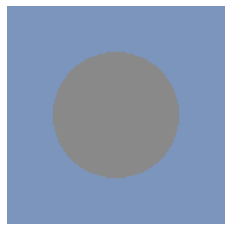

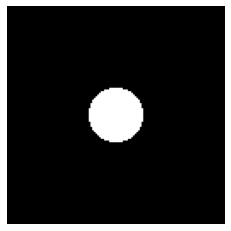

In [2]:
im = OrthoFriendlyExample().render()
im.show()
# im.writeToFile("OrthoFriendlyExample.png")
ref = Image(path="./ref/step0.png").GetFloatCopy();
ref.show()
print("Max diff with reference is {}".format(np.abs(ref.pixels-im.pixels).max()))
print("number of pixels with diff > 0.01 is {}".format(np.sum(np.abs(ref.pixels-im.pixels)>0.01)))

### Step 1
When you have completed Step 0 your the image below should look like:
![Step1](./ref/step1.png)

Max diff with reference is 217
number of pixels with diff > 0.01 is 110030


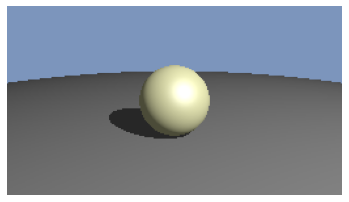

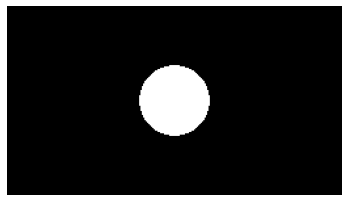

In [3]:
im = TwoSpheresExample().render(output_shape = [144,256])
im.show()

ref = Image(path="./ref/step1.png").GetUIntCopy();
ref.show()
print("Max diff with reference is {}".format(np.abs(ref.pixels-im.pixels).max()))
print("number of pixels with diff > 0.01 is {}".format(np.sum(np.abs(ref.pixels-im.pixels)>0.01)))

### Step 2-7
See the [assignment docs](https://www.cs.cornell.edu/courses/cs4620/2023fa/assignments/docs/category/assignment-4)

The code in the three cells below can be used to test out each of three different test scenes 

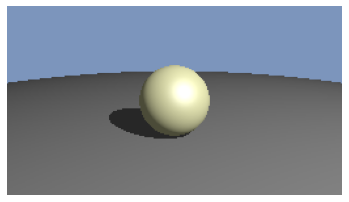

In [4]:
im = TwoSpheresExample().render(output_shape = [144,256])
im.show()

In [ ]:
im = ThreeSpheresExample().render(output_shape = [144,256])
im.show()

In [ ]:
from ExampleSceneDef import *
im = CubeExample().render(output_shape=[144,256])
im.show()

In [ ]:
from ExampleSceneDef import *
im = CornellBoxExample().render()
im.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def parse_obj(file_path):
    vertices = []
    faces = []
    face_materials = []
    current_material = None

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if not parts:
                continue
            if parts[0] == 'v':  # Vertex
                vertices.append([float(p) for p in parts[1:]])
            elif parts[0] == 'f':  # Face
                face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                faces.append(face)
                face_materials.append(current_material)
            elif parts[0] == 'usemtl':  # Material usage
                current_material = parts[1]

    return vertices, faces, face_materials

def parse_mtl(file_path):
    materials = {}
    current_material = None

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if not parts:
                continue
            if parts[0] == 'newmtl':  # New material
                current_material = parts[1]
                materials[current_material] = {}
            elif parts[0] == 'Kd':  # Diffuse color
                if current_material:
                    materials[current_material]['Kd'] = [float(c) for c in parts[1:]]

    return materials

def render_obj(vertices, faces, face_materials, materials):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for face, material in zip(faces, face_materials):
        color = materials.get(material, {}).get('Kd', [0.5, 0.5, 0.5])  # Default to gray if material is missing
        poly3d = [[vertices[vert_id] for vert_id in face]]
        ax.add_collection3d(Poly3DCollection(poly3d, facecolors=[color], linewidths=1, edgecolors='r', alpha=0.7))

    # Set limits and labels
    x, y, z = zip(*vertices)
    ax.set_xlim([min(x), max(x)])
    ax.set_ylim([min(y), max(y)])
    ax.set_zlim([min(z), max(z)])
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    plt.show()

# File paths
obj_file = "rubiks_cube.obj"
mtl_file = "rubiks_cube.mtl"

# Parse files
materials = parse_mtl(mtl_file)
vertices, faces, face_materials = parse_obj(obj_file)

# Render with materials
render_obj(vertices, faces, face_materials, materials)

In [ ]:
from ExampleSceneDef import *
im = RubiksCubeExample().render()
im.show()


In [2]:
im.writeToFile("RubiksCubeExample.png")

In [ ]:
from ExampleSceneDef import *
im = TorusExample().render(output_shape = [144,256])
im.show()

In [ ]:
from ExampleSceneDef import *
im = EllipsoidExample().render(output_shape = [144,256])
im.show()

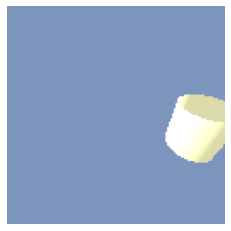

In [1]:
from ExampleSceneDef import *
im = CylinderExample().render(output_shape = [128,128])
im.show()